In [39]:
#step 1: Load the dataset into a pandas DataFrame and print it along with its shape
import pandas as pd

# creating dataframe containing csv data
df = pd.read_csv('Social_Network_Ads.csv')

print (df) # printing dataframe

df.shape # printing shape

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


(400, 5)

In [40]:
#step 2: Print the column names and the data type of each column
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [41]:
# encoding 'Gender' to be binary 
# dropping 'User ID' from df (unnecessary feature)
from sklearn import preprocessing

l_e = preprocessing.LabelEncoder()

df['Gender'] = l_e.fit_transform(df['Gender'])

df.drop('User ID', axis=1, inplace=True)

print(df.head())

    Gender  Age  EstimatedSalary  Purchased
0        1   19            19000          0
1        1   35            20000          0
2        0   26            43000          0
3        0   27            57000          0
4        1   19            76000          0
5        1   27            58000          0
6        0   27            84000          0
7        0   32           150000          1
8        1   25            33000          0
9        0   35            65000          0
10       0   26            80000          0
11       0   26            52000          0
12       1   20            86000          0
13       1   32            18000          0
14       1   18            82000          0
15       1   29            80000          0
16       1   47            25000          1
17       1   45            26000          1
18       1   46            28000          1
19       0   48            29000          1


In [42]:
#step 3: Normalize the numerical input features 

# making copy of df
scaled_features = df.copy()

# determining which cols to scale
col_names = ['Age', 'EstimatedSalary']
features = scaled_features[col_names]

# scale columns 
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_names] = features

# creating X and y sets 
X = df.iloc[:,0:3] # gender, age, salary
y = df.iloc[:,3]   # purchased 

# print(X) # print to make sure each contains correct features
# print(y)


15 0.1175
16 0.125
17 0.11
18 0.13
19 0.12
20 0.1175
21 0.12
22 0.1125
23 0.12
24 0.105
25 0.115
26 0.1225
27 0.1125
28 0.125
29 0.1125
30 0.1175
31 0.1125
32 0.1125
33 0.11
34 0.1175
35 0.1075
36 0.11
37 0.1075
38 0.11
39 0.1125
40 0.1025
41 0.11
42 0.105
43 0.1175
44 0.11
45 0.12
46 0.1075
47 0.11
48 0.115
49 0.1125
50 0.1125
51 0.1075
52 0.1025
53 0.12
54 0.1075
55 0.1075
56 0.1125
57 0.11
58 0.115
59 0.1125
60 0.115
61 0.1
62 0.105
63 0.1075
64 0.1175
65 0.11
66 0.105
67 0.1075
68 0.1025
69 0.1225
70 0.115
71 0.115
72 0.1175
73 0.1075
74 0.115
75 0.1075
76 0.11
77 0.11
78 0.1075
79 0.1075
80 0.1175
81 0.1125
82 0.115
83 0.115
84 0.11
85 0.1075
86 0.11
87 0.115
88 0.105
89 0.115
90 0.105
91 0.1075
92 0.1125
93 0.1125
94 0.12
95 0.1075
96 0.1125
97 0.11
98 0.105
99 0.11
100 0.1125
101 0.11
102 0.115
103 0.1075
104 0.105
105 0.105
106 0.12
107 0.1075
108 0.115
109 0.1125
110 0.1075
111 0.1075
112 0.1125
113 0.1125
114 0.1125
115 0.115
116 0.1125
117 0.1075
118 0.115
119 0.105
120 0.10

/Users/katherinekuenster/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/katherinekuenster/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


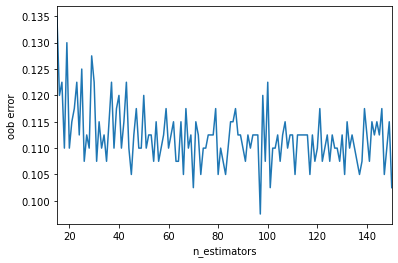

In [57]:
#step 4: Perform Random Forest Classification using sklearn. Make sure to enable bootstrap and oob_score
#step 5: Find the oob error for different numbers of trees. Figure out which parameter sets the number of trees.

from sklearn.ensemble import RandomForestClassifier

for i in range(15, 151):
    forest = RandomForestClassifier(bootstrap=True, oob_score = True, n_estimators =i)
    forest.fit(X, y)
    print(i, round(1-forest.oob_score_, 5))

#step 6: Plot the oob error vs number of trees. (Similar to example in class) 
#######  and find the number of trees with the lowest error. If multiple, report all.
    
import matplotlib.pyplot as plt 

# creating arrays to be filled with <i, oob error> for <x,y>
xs = []
ys = []

# loop through each i (15-150) and append each <i,oob> to <xs,ys>
for i in range(15, 151):
    15 <= i <= 150
    random_forest = RandomForestClassifier(n_estimators = i, bootstrap = True, oob_score = True)
    random_forest.fit(X, y)
    oob_error = 1 - random_forest.oob_score_
    xs.append(i)
    ys.append(oob_error)

# plot oob error vs. number trees
plt.plot(xs, ys)
plt.xlim(15,150)
plt.xlabel('n_estimators')
plt.ylabel('oob error')
plt.show()